In [4]:
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def load_spm_design_matrix(spm_file):
    spm_data = loadmat(spm_file, squeeze_me=True, struct_as_record=False)
    design_matrix = spm_data['SPM'].xX.X
    column_names = spm_data['SPM'].xX.name
    return pd.DataFrame(design_matrix, columns=column_names)

In [8]:
nilearn_sample = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/nilearn/exclude_iti_20250221/sub-01/run-test/sub-01_run-test_design_matrix.csv' 
spm_sample = '/home/ubuntu/data/learning-habits/spm_format_20250603/outputs/glm1_2025-06-05-05-15/sub-01/run-3/SPM.mat'
old_spm_sample = '/home/ubuntu/data/learning-habits/spm_format/new_outputs/2025-05-26-04-18/sub-01/run-3/SPM.mat'

In [9]:
nilearn_dm = pd.read_csv(nilearn_sample).iloc[:,:39]
spm_dm = load_spm_design_matrix(spm_sample)
old_spm_dm = load_spm_design_matrix(old_spm_sample)

In [10]:
nilearn_dm.shape

(593, 39)

In [11]:
spm_dm.shape

(593, 34)

/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


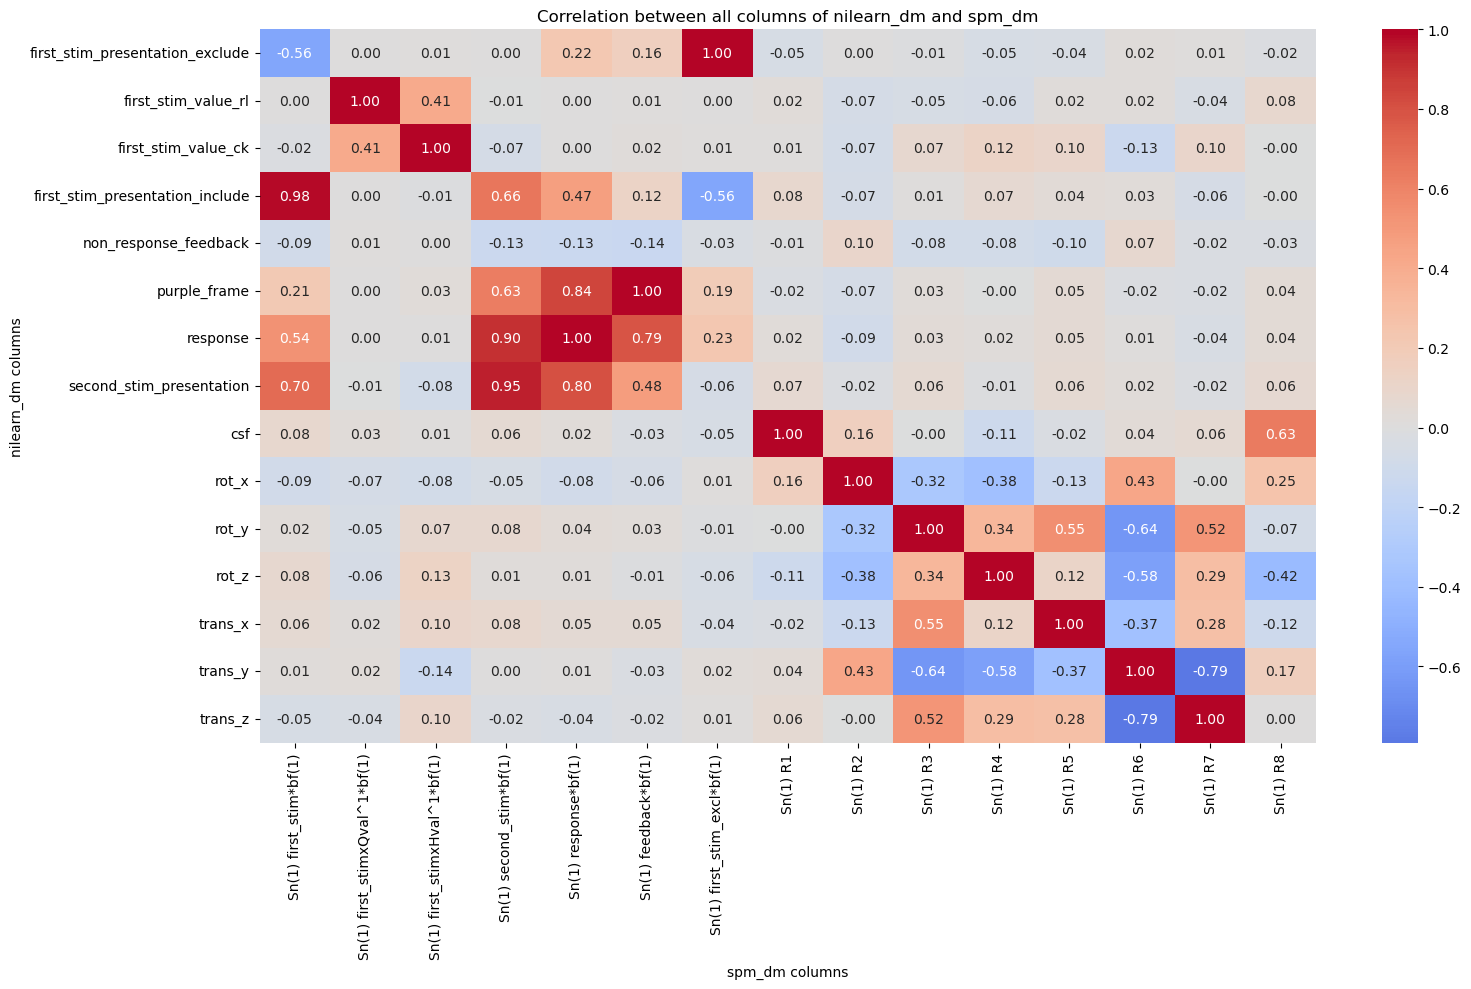

In [ ]:
# Compute correlation matrix between all columns of nilearn_dm and all columns of spm_dm
corr_matrix = nilearn_dm.corrwith(spm_dm, axis=0)
corr_df = pd.DataFrame(
    [[nilearn_dm[col1].corr(spm_dm[col2]) for col2 in spm_dm.columns] for col1 in nilearn_dm.columns],
    index=nilearn_dm.columns,
    columns=spm_dm.columns
)

plt.figure(figsize=(16, 10))
sns.heatmap(corr_df.iloc[:15,:15], cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation between all columns of nilearn_dm and spm_dm')
plt.xlabel('spm_dm columns')
plt.ylabel('nilearn_dm columns')
plt.tight_layout()
plt.show()

/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


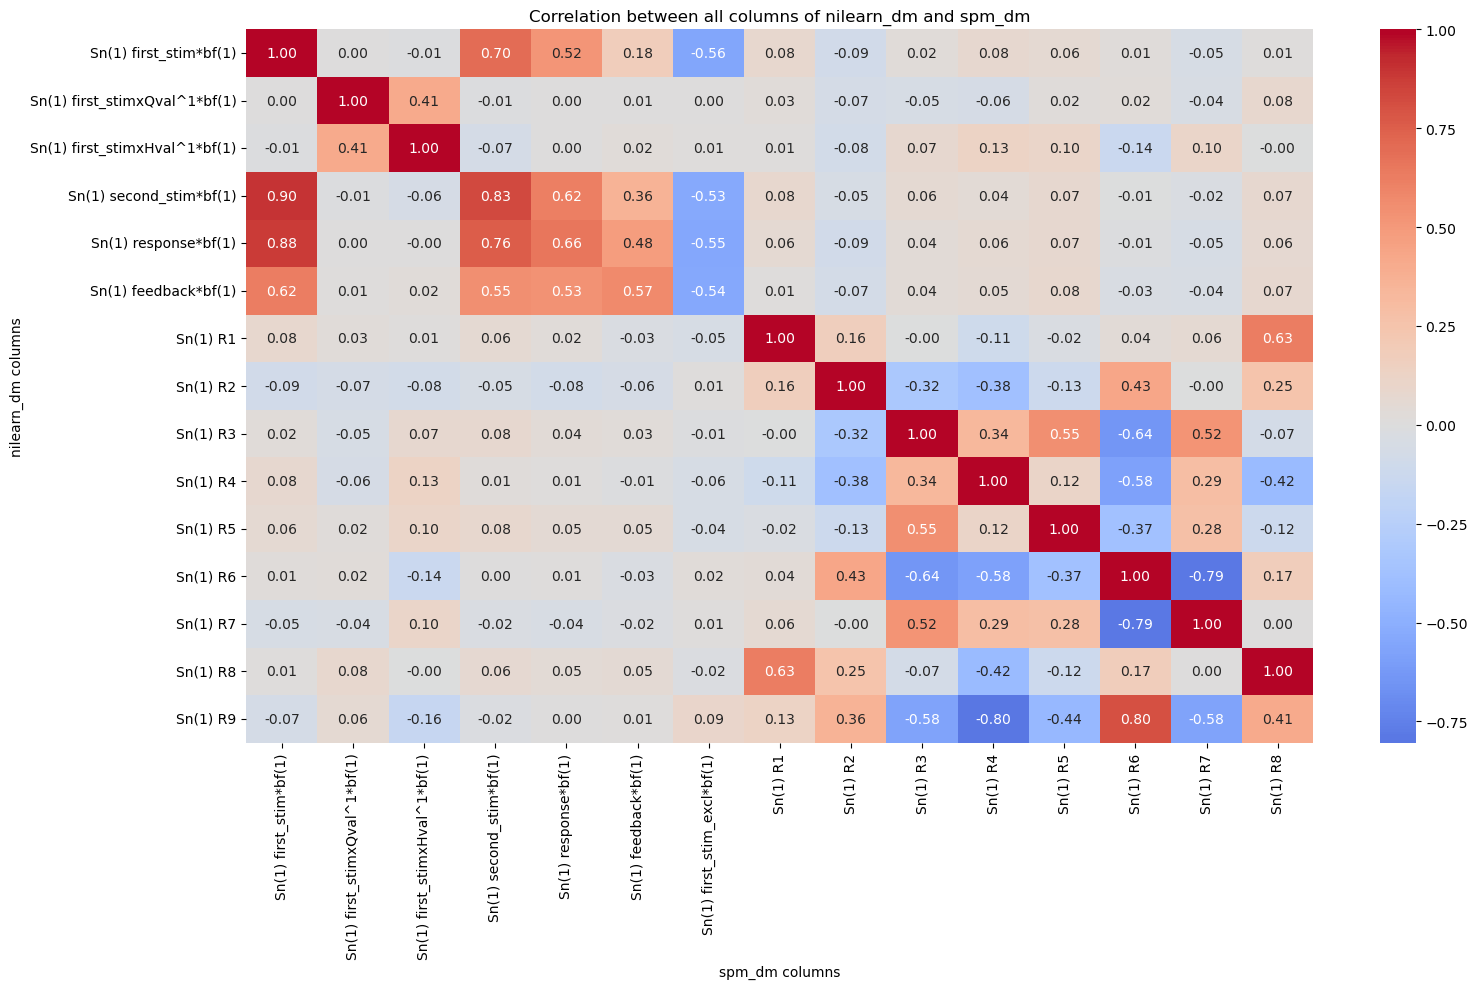

In [12]:
# Compute correlation matrix between all columns of nilearn_dm and all columns of spm_dm
corr_matrix = old_spm_dm.corrwith(spm_dm, axis=0)
corr_df = pd.DataFrame(
    [[old_spm_dm[col1].corr(spm_dm[col2]) for col2 in spm_dm.columns] for col1 in old_spm_dm.columns],
    index=old_spm_dm.columns,
    columns=spm_dm.columns
)

plt.figure(figsize=(16, 10))
sns.heatmap(corr_df.iloc[:15,:15], cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation between all columns of nilearn_dm and spm_dm')
plt.xlabel('spm_dm columns')
plt.ylabel('nilearn_dm columns')
plt.tight_layout()
plt.show()

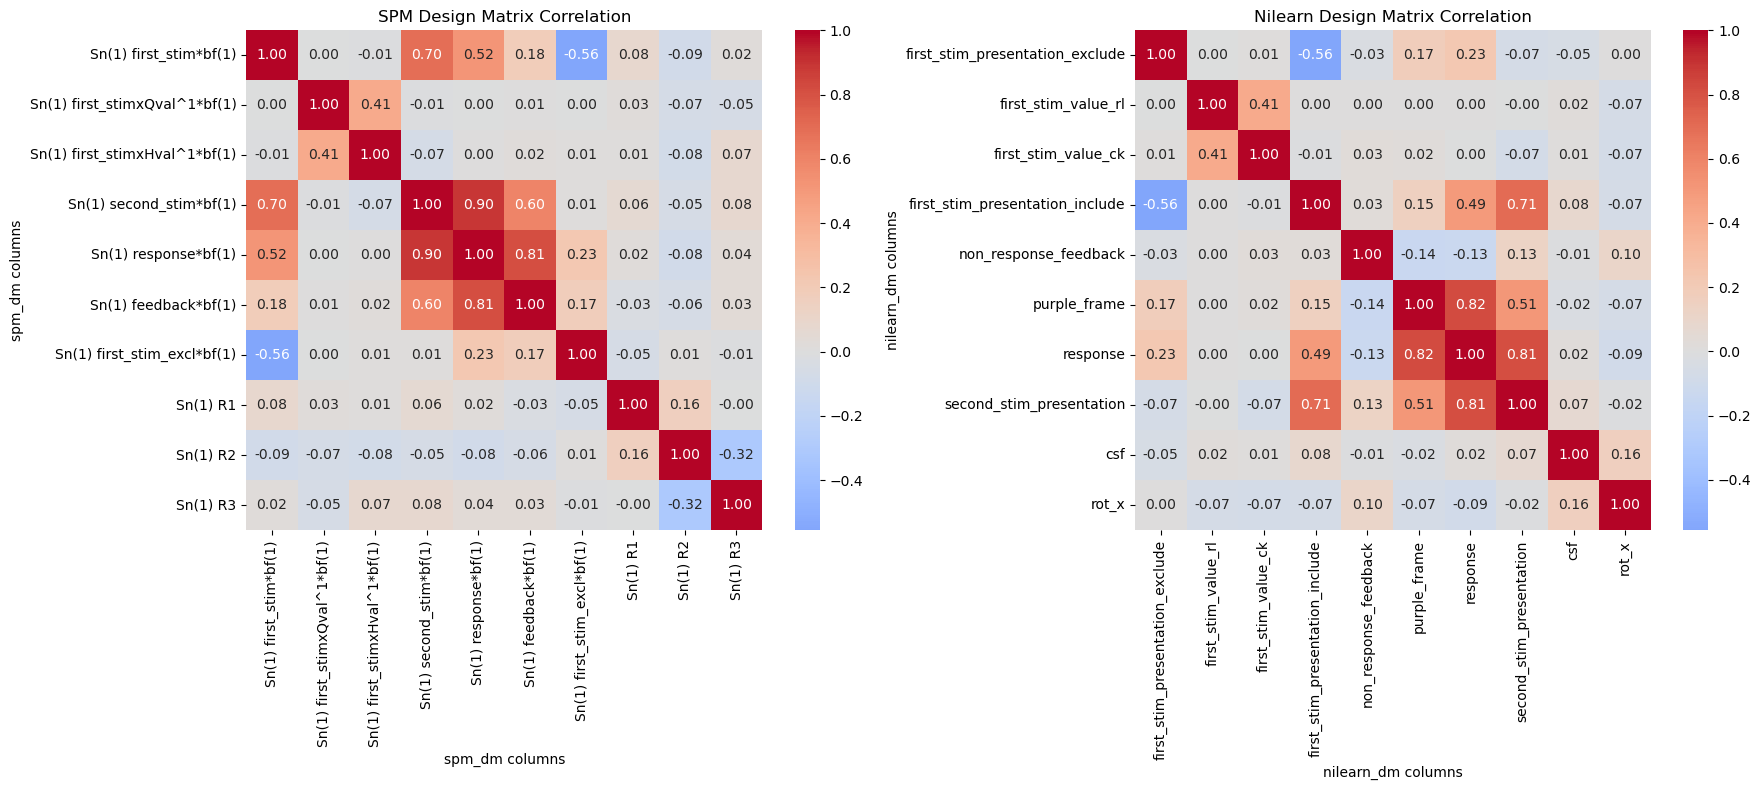

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# SPM design matrix correlation heatmap
spm_corr = spm_dm.corr()
sns.heatmap(spm_corr.values[:10, :10], cmap='coolwarm', center=0, annot=True, fmt=".2f", ax=axes[0],
            xticklabels=spm_corr.columns[:10], yticklabels=spm_corr.columns[:10])
axes[0].set_title('SPM Design Matrix Correlation')
axes[0].set_xlabel('spm_dm columns')
axes[0].set_ylabel('spm_dm columns')

# Nilearn design matrix correlation heatmap
nilearn_corr = nilearn_dm.corr()
sns.heatmap(nilearn_corr.values[:10, :10], cmap='coolwarm', center=0, annot=True, fmt=".2f", ax=axes[1],
            xticklabels=nilearn_corr.columns[:10], yticklabels=nilearn_corr.columns[:10])
axes[1].set_title('Nilearn Design Matrix Correlation')
axes[1].set_xlabel('nilearn_dm columns')
axes[1].set_ylabel('nilearn_dm columns')

plt.tight_layout()
plt.show()